<a href="https://colab.research.google.com/github/sara-gaballa/ADHD-detection-from-EEG-signals-using-ML-and-DL-models/blob/main/DL_with_feature_extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


##Features functions

In [ ]:
pip install entropy

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for entropy: filename=entropy-0.1.5-py3-none-any.whl size=7177 sha256=1a8e0534b98ce60a06f9ea228b007aea6abc3f4671a5b2d4d74d49fb722af92b
  Stored in directory: /root/.cache/pip/wheels/7b/ae/a5/3981344d7be76f408fc6c9c280cb1706f033d4c1018913897a
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13705 sha256=31fa4eec05907bde27adb11d8db881605fc6271bbfea8705aa275ffdd0f6456d
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built entropy docopt


In [ ]:
pip install antropy

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.1/48.1 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 MB 13.7 MB/s eta 0:00:00
  Created wheel for antropy: filename=antropy-0.1.6-py3-none-any.whl size=16878 sha256=5f72964069c720babcfb9a3d92ee1f8e502967ad5dd409ec3087c0d266db3c2e
  Stored in directory: /root/.cache/pip/wheels/98/22/06/e91d7bb213c7133d5e2eb34258623e1e19928d5f05e1ee6812
Successfully built antropy
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.39.1
    Uninstalling llvmlite-0.39.1:
      Successfully uninstalled llvmlite-0.39.1
  Attempting uninstall: numba
    Found existing installation: numba 0.56.4
    Uninstalling numba-0.56.4:
      Successfully uninstalled numba-0.56.4


In [ ]:
def bandpower(data, sf, band, window_sec=None, relative=False):
    """Compute the average power of the signal x in a specific frequency band.

    Parameters
    ----------
    data : 1d-array
        Input signal in the time-domain.
    sf : float
        Sampling frequency of the data.
    band : list
        Lower and upper frequencies of the band of interest.
    window_sec : float
        Length of each window in seconds.
        If None, window_sec = (1 / min(band)) * 2
    relative : boolean
        If True, return the relative power (= divided by the total power of the signal).
        If False (default), return the absolute power.

    Return
    ------
    bp : float
        Absolute or relative band power.
    """
    from scipy.signal import welch
    from scipy.integrate import simps
    band = np.asarray(band)
    low, high = band

    # Define window length
    if window_sec is not None:
        nperseg = window_sec * sf
    else:
        nperseg = (2 / low) * sf

    # Compute the modified periodogram (Welch)
    freqs, psd = welch(data, sf, nperseg=nperseg)

    # Frequency resolution
    freq_res = freqs[1] - freqs[0]

    # Find closest indices of band in frequency vector
    idx_band = np.logical_and(freqs >= low, freqs <= high)

    # Integral approximation of the spectrum using Simpson's rule.
    bp = simps(psd[idx_band], dx=freq_res)

    if relative:
        bp /= simps(psd, dx=freq_res)
    return bp

In [ ]:
pip install git+https://github.com/forrestbao/pyeeg.git

  Cloning https://github.com/forrestbao/pyeeg.git to /tmp/pip-req-build-6glbdgke
  Running command git clone --filter=blob:none --quiet https://github.com/forrestbao/pyeeg.git /tmp/pip-req-build-6glbdgke
  Resolved https://github.com/forrestbao/pyeeg.git to commit a6c18bb093e4748f9d9c208535a6ae024a0802b8
  Preparing metadata (setup.py) ... done
  Created wheel for pyeeg: filename=pyeeg-0.4.4-py2.py3-none-any.whl size=28111 sha256=05b7635da8ea1026455230d0cb7c1cb1083bcb653419d4b825d35502c360f879
  Stored in directory: /tmp/pip-ephem-wheel-cache-_zrfg8o2/wheels/a8/c4/1a/cee09dcc12a11620066d35ace42e3c1e3bfbcc1db3a0ce7788
Successfully built pyeeg


In [ ]:
pip install git+https://github.com/raphaelvallat/entropy.git

  Cloning https://github.com/raphaelvallat/entropy.git to /tmp/pip-req-build-w2g5h7bd
  Running command git clone --filter=blob:none --quiet https://github.com/raphaelvallat/entropy.git /tmp/pip-req-build-w2g5h7bd
  Resolved https://github.com/raphaelvallat/entropy.git to commit 216cd1c10148fe13fc02f56c69724028daec58c8
  Preparing metadata (setup.py) ... done
  Created wheel for entropy: filename=entropy-0.1.3-py3-none-any.whl size=16108 sha256=eafcaefe6bae8f289a7eb8d2e11911362620b532c397551bcbca76e658098fab
  Stored in directory: /tmp/pip-ephem-wheel-cache-ss_4po74/wheels/86/6f/2e/c44cb24d79e0dcdbb5938aae85d12613d99d925b56086cd096
Successfully built entropy
  Attempting uninstall: entropy
    Found existing installation: entropy 0.1.5
    Uninstalling entropy-0.1.5:
      Successfully uninstalled entropy-0.1.5


In [ ]:
from scipy import stats
import scipy as sp
import antropy as ent

def mean(data):
    return np.mean(data,axis=-1)

def std(data):
    return np.std(data,axis=-1)

def ptp(data):
    return np.ptp(data,axis=-1)

def var(data):
        return np.var(data,axis=-1)

def minim(data):
      return np.min(data,axis=-1)

def maxim(data):
      return np.max(data,axis=-1)

def rms(data): #root mean square
      return  np.sqrt(np.mean(data**2,axis=-1))

def abs_diffs_signal(data):
    return np.sum(np.abs(np.diff(data,axis=-1)),axis=-1)

def median(data):
    return np.median(data, axis=-1)

def q1(data):
    return np.quantile(data, 0.25, axis=-1)

def q3(data):
    return np.quantile(data, 0.75, axis=-1)

def skewness(data):
    return stats.skew(data,axis=-1)

def kurtosis(data):
    return stats.kurtosis(data,axis=-1)

def mobility(data):
  mob, comp = ent.hjorth_params(data)
  return mob

def complexity(data):
  mob, comp = ent.hjorth_params(data)
  return comp

def power(data):
  return np.sum(data*data, 1) / data.size

def energy(data):
  return np.sum(data*data, 1)

def fft(data):
  return np.fft(data, axis=-1)

PyEEG features

In [ ]:
import pyeeg
from pyeeg import bin_power, pfd, hfd, svd_entropy, spectral_entropy, dfa, fisher_info, ap_entropy, hurst

def pfd2(data):
  res = []
  for channel in data:
    res.append(pfd(channel))
  return res

def hfd2(data):
  res = []
  for channel in data:
    res.append(higuchi_fd(channel))
  return res

def svd(data):
  res = []
  for channel in data:
    res.append(svd_entropy(channel))
  return res

def spe(data):
  res = []
  band = [0.5,4,8,12,30,64]
  fs = 128
  for channel in data:
    Power, Power_Ratio = bin_power(channel, band, fs)
    res.append(spectral_entropy(channel, band, fs, Power_Ratio=Power_Ratio))
  return res

def dfa2(data):
  res = []
  for channel in data:
    res.append(detrended_fluctuation(channel))
  return res

def fish(data):
  res = []
  for channel in data:
    res.append(fisher_info(channel))
  return res

def ape(data):
  res = []
  for channel in data:
    res.append(ap_entropy(channel))
  return res

def hurst2(data):
  res = []
  for channel in data:
    res.append(hurst(channel))
  return res

In [ ]:
from entropy import petrosian_fd, katz_fd, higuchi_fd, detrended_fluctuation

/usr/local/lib/python3.10/dist-packages/entropy/fractal.py:197: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit('float64(float64[:], int32)')


In [ ]:
def concatenate_features(data):
    return np.concatenate((mean(data),std(data),ptp(data),var(data),minim(data),maxim(data),median(data), q1(data), q3(data),
                          rms(data),abs_diffs_signal(data), mobility(data), complexity(data), power(data), energy(data),
                          skewness(data),kurtosis(data),spe(data),katz_fd(data),hfd2(data),dfa2(data),
                           petrosian_fd(data),hurst2(data)),axis=-1)

##Data 2 importing

In [ ]:
import os
import pandas as pd

folder_path = '/content/drive/MyDrive/Dataset 2/data files'

In [ ]:
pip install mat73

In [ ]:
import scipy.io
import os
import numpy as np
import mat73

# Prefix and suffix of the filenames
prefix = 'd'
suffix = '.mat'
# Range of file numbers to read
start_num = 1
end_num = 7

# Initialize an empty list to store the extracted data
data_list = []

# Loop over the desired file numbers and read the corresponding .mat files
for num in range(start_num, end_num+1):
  # Construct the filename
  filename = prefix + str(num) + suffix
  filepath = os.path.join(folder_path, filename)

  # Check if file exists
  if os.path.exists(filepath):
      # Load the .mat file and extract the desired variables
      mat = mat73.loadmat(filepath)

      # Append the extracted data to the list of data
      data_list.append(np.array(mat[prefix+str(num)]))
  else:
      print('File ' + filename + ' does not exist.')

In [ ]:
# Concatente all arrays
data = data_list[0]
for i in range(1, 7):
  data = np.concatenate((data, data_list[i]))
print(data.shape)
del(data_list)

(33902, 56, 385)


In [ ]:
import numpy as np

control_trials = 10129
ADD_trials = 13031
ADHD_trials = 10742

HC = np.zeros(control_trials)
ADD = np.ones(ADD_trials + ADHD_trials )
# ADHD = np.full(ADHD_trials, "ADHD")  # Fill with 2
# y = np.concatenate((HC, ADD, ADHD))
y = np.concatenate((HC, ADD))
print(y.shape)


(33902,)


In [ ]:
# import numpy as np
# from scipy import stats
# from sklearn.feature_selection import SelectKBest, f_classif
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score

# from tqdm import tqdm_notebook
# features=[]
# for trial in tqdm_notebook(data):
#     features.append(concatenate_features(trial))
# features=np.array(features)
# features.shape

# import numpy as np
# # Saving the array
# np.savetxt("/content/drive/MyDrive/Dataset 2/" + "features_pyeeg2_Data2.csv", features, delimiter=",")

In [ ]:
# import numpy as np
# # Saving the array
# np.savetxt("/content/drive/MyDrive/Dataset 2/" + "features_pyeeg2_Data2.csv", features, delimiter=",")

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.signal import welch
# from scipy.integrate import simps

# window_size = 2

# # Function to compute PSD features for a single EEG channel
# def compute_psd_features(eeg_channel, fs):
#     # Compute the Power Spectral Density using Welch's method
#     f, psd = welch(eeg_channel, fs=fs, nperseg=fs*window_size)  # Adjust nperseg based on your data

#     # Define frequency bands (adjust as needed)
#     delta_band = (0.5, 4)     # Delta (0.5-4 Hz)
#     theta_band = (4, 8)       # Theta (4-8 Hz)
#     alpha_band = (8, 13)      # Alpha (8-12 Hz)
#     beta_band = (13, 30)      # Beta (12-30 Hz)
#     gamma_band = (30, 64)     # Gamma (30-64 Hz)

#     # Calculate the mean power in each frequency band
#     delta_power = np.mean(psd[(f >= delta_band[0]) & (f < delta_band[1])])

#     theta_power = np.mean(psd[(f >= theta_band[0]) & (f < theta_band[1])])

#     alpha_power = np.mean(psd[(f >= alpha_band[0]) & (f < alpha_band[1])])

#     beta_power = np.mean(psd[(f >= beta_band[0]) & (f < beta_band[1])])

#     gamma_power = np.mean(psd[(f >= gamma_band[0]) & (f < gamma_band[1])])

#     return delta_power, theta_power, alpha_power, beta_power, gamma_power



In [ ]:
# # Sample 3D EEG data (replace this with your actual EEG data)
# num_samples = data.shape[0]
# num_channels = data.shape[1]
# num_timesteps = data.shape[2]
# fs = 500  # Sampling frequency in Hz

# # Initialize lists to store PSD features for each EEG channel
# delta_powers = []
# theta_powers = []
# alpha_powers = []
# beta_powers = []
# gamma_powers = []

# # Loop through each EEG sample and each EEG channel to compute PSD features
# for sample in range(num_samples):
#     sample_delta_powers = []
#     sample_theta_powers = []
#     sample_alpha_powers = []
#     sample_beta_powers = []
#     sample_gamma_powers = []

#     for channel in range(num_channels):
#         eeg_channel = data[sample, channel, :]
#         delta_power, theta_power, alpha_power, beta_power, gamma_power = compute_psd_features(eeg_channel, fs)

#         sample_delta_powers.append(delta_power)
#         sample_theta_powers.append(theta_power)
#         sample_alpha_powers.append(alpha_power)
#         sample_beta_powers.append(beta_power)
#         sample_gamma_powers.append(gamma_power)

#     delta_powers.append(sample_delta_powers)
#     theta_powers.append(sample_theta_powers)
#     alpha_powers.append(sample_alpha_powers)
#     beta_powers.append(sample_beta_powers)
#     gamma_powers.append(sample_gamma_powers)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# # Combine the extracted PSD features into a single feature matrix
# psd_features = np.column_stack((delta_powers, theta_powers, alpha_powers, beta_powers, gamma_powers))
# nfeatures = np.hstack((features, psd_features))

Save the calculated features


In [ ]:
# # Saving the array
# np.savetxt("/content/drive/MyDrive/Dataset 2/" + "ffffffeatures_pyeeg2_Data2.csv", nfeatures, delimiter=",")

Reading from file


In [ ]:
# Reading the csv into an array (for the first features)
nnfeatures = np.genfromtxt("/content/drive/MyDrive/Dataset 2/features_pyeeg2_Data2.csv", delimiter=",")
print(nnfeatures.shape)

(33902, 1288)


In [ ]:
# Reading the csv into an array (for both features)
nfeatures = np.genfromtxt("/content/drive/MyDrive/Dataset 2/ffffffeatures_pyeeg2_Data2.csv", delimiter=",")
print(nfeatures.shape)

(33902, 1568)


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
from scipy import stats
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt  # Importing the 'pyplot' module
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.linear_model import MultiTaskLasso, Lasso
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV

In [ ]:
import numpy as np

# Assuming nfeatures is your input numpy array
# Replace NaN values with zeros
nfeatures_cleaned = np.nan_to_num(nfeatures, nan=0.0)



### Mariam

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(nfeatures_cleaned, y, test_size=0.2, random_state=42)

In [ ]:
pipeline = Pipeline([
                     ('scaler',StandardScaler()),
                     ('model',Lasso())
])
search = GridSearchCV(pipeline,
                      {'model__alpha':[0.00001, 0.0001, 0.001, 0.01, 0.1]},
                      cv = 5, scoring="neg_mean_squared_error",verbose=3
                      )

In [ ]:
search.fit(X_train,y_train)
search.best_params_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.055e+03, tolerance: 4.534e-01
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END ...............model__alpha=1e-05;, score=-0.126 total time= 1.1min


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.052e+03, tolerance: 4.553e-01
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END ...............model__alpha=1e-05;, score=-0.164 total time= 1.1min


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.067e+03, tolerance: 4.555e-01
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END ...............model__alpha=1e-05;, score=-0.133 total time= 1.0min


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.060e+03, tolerance: 4.538e-01
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END ...............model__alpha=1e-05;, score=-0.240 total time= 1.0min


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.075e+03, tolerance: 4.574e-01
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END ...............model__alpha=1e-05;, score=-0.137 total time= 1.1min


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.603e+02, tolerance: 4.534e-01
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END ..............model__alpha=0.0001;, score=-0.123 total time= 1.1min


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.378e+02, tolerance: 4.553e-01
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END ..............model__alpha=0.0001;, score=-0.152 total time= 1.1min


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.599e+02, tolerance: 4.555e-01
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END ..............model__alpha=0.0001;, score=-0.127 total time= 1.1min


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.079e+02, tolerance: 4.538e-01
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END ..............model__alpha=0.0001;, score=-0.195 total time=  59.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.676e+02, tolerance: 4.574e-01
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END ..............model__alpha=0.0001;, score=-0.129 total time= 1.1min


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.387e+01, tolerance: 4.534e-01
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END ...............model__alpha=0.001;, score=-0.126 total time=  50.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.485e+01, tolerance: 4.553e-01
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END ...............model__alpha=0.001;, score=-0.127 total time=  50.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.014e+01, tolerance: 4.555e-01
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END ...............model__alpha=0.001;, score=-0.121 total time=  51.5s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.362e+01, tolerance: 4.538e-01
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END ...............model__alpha=0.001;, score=-0.136 total time=  50.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.738e+01, tolerance: 4.574e-01
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END ...............model__alpha=0.001;, score=-0.121 total time=  54.2s
[CV 1/5] END ................model__alpha=0.01;, score=-0.161 total time=   9.8s
[CV 2/5] END ................model__alpha=0.01;, score=-0.158 total time=  11.4s
[CV 3/5] END ................model__alpha=0.01;, score=-0.154 total time=  12.5s
[CV 4/5] END ................model__alpha=0.01;, score=-0.159 total time=   9.0s
[CV 5/5] END ................model__alpha=0.01;, score=-0.154 total time=   9.4s
[CV 1/5] END .................model__alpha=0.1;, score=-0.213 total time=   1.8s
[CV 2/5] END .................model__alpha=0.1;, score=-0.209 total time=   1.7s
[CV 3/5] END .................model__alpha=0.1;, score=-0.209 total time=   2.0s
[CV 4/5] END .................model__alpha=0.1;, score=-0.212 total time=   1.6s
[CV 5/5] END .................model__alpha=0.1;, score=-0.205 total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.665e+01, tolerance: 5.688e-01
  model = cd_fast.enet_coordinate_descent(


{'model__alpha': 0.001}

In [ ]:
coefficients = search.best_estimator_.named_steps['model'].coef_
importance = np.abs(coefficients)
f = [i for i in range(X_train.shape[1])]


In [ ]:
sel = np.array(f)[importance > 0.02]
sel.shape

(85,)

In [ ]:
sel

array([  56,   67,   70,   73,   76,   77,   80,   84,   86,   87,   93,
         95,   96,  105,  111,  168,  182,  189,  192,  205,  221,  223,
        521,  553,  562,  565,  571,  572,  574,  576,  580,  584,  591,
        592,  593,  596,  603,  606,  608,  613,  614,  623,  624,  627,
        628,  630,  632,  639,  643,  651,  659,  660,  661,  663,  667,
        668,  671,  684,  695,  707,  709,  711,  723, 1073, 1082, 1083,
       1086, 1098, 1099, 1104, 1106, 1107, 1109, 1111, 1115, 1116, 1225,
       1431, 1432, 1456, 1457, 1480, 1511, 1528, 1533])

In [ ]:
X_train_lasso_selected = X_train[:, sel]
X_test_lasso_selected = X_test[:, sel]
X_train_lasso_selected.shape

(27121, 85)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder,MinMaxScaler, StandardScaler
from sklearn.utils import shuffle
from sklearn.utils import class_weight
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten ,LSTM,RepeatVector,TimeDistributed,Bidirectional,Input,Concatenate,GRU,Conv1D,BatchNormalization,LeakyReLU,MaxPool1D,GlobalAveragePooling1D,Dense,Dropout,AveragePooling1D
from tensorflow.keras.models import Model
from keras.optimizers import Adam
#from keras.layers import  Conv2D, MaxPooling2D
from keras.utils import to_categorical
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, roc_auc_score
from tensorflow.keras.backend import clear_session

In [ ]:
ne = 128
lr = 0.00001

def modeling(x_train, y_train, mod):
    clear_session()
    model = tf.keras.Sequential()

    if mod == 'BI_LSTM':
        model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(ne, activation='tanh', return_sequences=True), input_shape=(X_train_lasso_selected.shape[1], 1)))
        model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(ne, return_sequences=True)))
        model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(ne, return_sequences=True)))
        model.add(tf.keras.layers.Flatten())
        model.add(tf.keras.layers.Dense(units=2, activation='softmax'))
        model.compile(optimizer=Adam(lr), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    elif mod == 'LSTM':
        model.add(tf.keras.layers.LSTM(ne, activation='tanh', return_sequences=True, input_shape=(X_train_lasso_selected.shape[1], X_train_lasso_selected.shape[2])))  # Adjust input shape
        model.add(tf.keras.layers.LSTM(ne, return_sequences=True))
        model.add(tf.keras.layers.LSTM(ne, return_sequences=True))
        model.add(tf.keras.layers.Flatten())
        model.add(tf.keras.layers.Dense(units=2, activation='softmax'))
        model.compile(optimizer=Adam(lr), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    elif mod == 'GRU':
        model.add(tf.keras.layers.GRU(ne, activation='tanh', return_sequences=True, input_shape=(x_train.shape[1], 1), reset_after=True, recurrent_activation='sigmoid'))  # Adjust input shape
        model.add(tf.keras.layers.GRU(ne, return_sequences=True, reset_after=True, recurrent_activation='sigmoid'))
        model.add(tf.keras.layers.Flatten())
        model.add(tf.keras.layers.Dense(units=2, activation='softmax'))
        model.compile(optimizer=Adam(lr), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    elif mod == 'CNN':
        model.add(Conv1D(filters=10, kernel_size=1, strides=1, input_shape=(X_train_lasso_selected.shape[1], X_train_lasso_selected.shape[2])))  # Adjust input shape
        model.add(BatchNormalization())
        model.add(LeakyReLU())
        model.add(MaxPool1D(pool_size=2, strides=2))
        model.add(Conv1D(filters=10, kernel_size=1, strides=1))
        model.add(LeakyReLU())
        model.add(MaxPool1D(pool_size=2, strides=2))
        model.add(Conv1D(filters=10, kernel_size=1, strides=1))
        model.add(LeakyReLU())
        model.add(AveragePooling1D(pool_size=2, strides=2))
        model.add(Conv1D(filters=10, kernel_size=1, strides=1))
        model.add(LeakyReLU())
        model.add(AveragePooling1D(pool_size=2, strides=2))
        model.add(Conv1D(filters=10, kernel_size=1, strides=1))
        model.add(LeakyReLU())
        model.add(GlobalAveragePooling1D())
        model.add(tf.keras.layers.Flatten())
        model.add(Dense(units=2, activation='softmax'))
        model.compile(optimizer=Adam(lr), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    h = model.fit(
        x_train,
        y_train,
        validation_split=0.1,
        batch_size=32,
        epochs=15,
        callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)],
        verbose=1
    )
    return model, h


##BI_LSTM

In [ ]:
import time
s_time=time.time()
model1,h1=modeling(X_train_lasso_selected,y_train,'BI_LSTM')
e_time=time.time()

Epoch 1/15
763/763 [==============================] - 901s 1s/step - loss: 0.5937 - accuracy: 0.6999 - val_loss: 0.5838 - val_accuracy: 0.7055
Epoch 2/15
763/763 [==============================] - 848s 1s/step - loss: 0.5878 - accuracy: 0.7021 - val_loss: 0.5840 - val_accuracy: 0.7081
Epoch 3/15
763/763 [==============================] - 815s 1s/step - loss: 0.5845 - accuracy: 0.7037 - val_loss: 0.5771 - val_accuracy: 0.7055
Epoch 4/15
763/763 [==============================] - 856s 1s/step - loss: 0.5823 - accuracy: 0.7071 - val_loss: 0.5750 - val_accuracy: 0.7081
Epoch 5/15
763/763 [==============================] - 884s 1s/step - loss: 0.5781 - accuracy: 0.7076 - val_loss: 0.5715 - val_accuracy: 0.7077
Epoch 6/15
763/763 [==============================] - 829s 1s/step - loss: 0.5739 - accuracy: 0.7085 - val_loss: 0.5686 - val_accuracy: 0.7151
Epoch 7/15
763/763 [==============================] - 873s 1s/step - loss: 0.5702 - accuracy: 0.7123 - val_loss: 0.5598 - val_accuracy: 0.7118

In [ ]:
time=(e_time - s_time)/60
time

216.64293466806413

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
#confusion matrix
def conf(x_test,y_test,model):
  label_encoder = LabelEncoder ()
  y_pred = model.predict(x_test,verbose=0)
  pred_class_y=[]
  for i in range(y_pred.shape[0]):
    pred_class_y.append(np.argmax(y_pred[:][i]))
  pred_class_y=np.array(pred_class_y)
  #pred_class_y=label_encoder.inverse_transform(pred_class_y)
  #y_test=label_encoder.inverse_transform(y_test)
  target=["Negative","Positive"]

  plt.figure(figsize=(10,5
                      ))
  fx=sns.heatmap(confusion_matrix(y_test,pred_class_y), annot=True, fmt=".2f",cmap="GnBu")
  fx.set_title('Confusion Matrix \n');
  fx.set_xlabel('\n Predicted Values\n')
  fx.set_ylabel('Actual Values\n');
  fx.xaxis.set_ticklabels(target)
  fx.yaxis.set_ticklabels(target)
  plt.show()

In [ ]:
acc=[]
precision=[]
recall=[]
f1=[]
auroc=[]
y_pred1=model1.predict(X_test_lasso_selected,verbose=0)
y_pred=[]
for i in range(y_pred1.shape[0]):
    y_pred.append(np.argmax(y_pred1[:][i]))
y_pred=np.array(y_pred)
acc.append(accuracy_score(y_test, y_pred) )
precision.append (precision_score(y_test, y_pred))
recall.append(recall_score(y_test, y_pred))
f1.append(f1_score(y_test, y_pred))
auroc.append(roc_auc_score(y_test, y_pred))


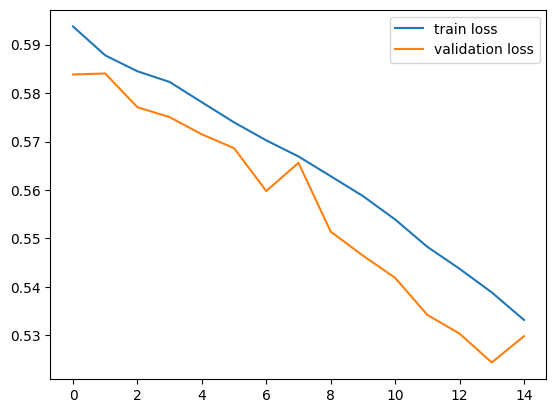

In [ ]:
import matplotlib.pyplot as plt

plt.plot(h1.history['loss'],label="train loss")
plt.plot(h1.history['val_loss'],label='validation loss')
#plt.plot(h.history['accuracy'],label='accuracy ')
plt.legend()

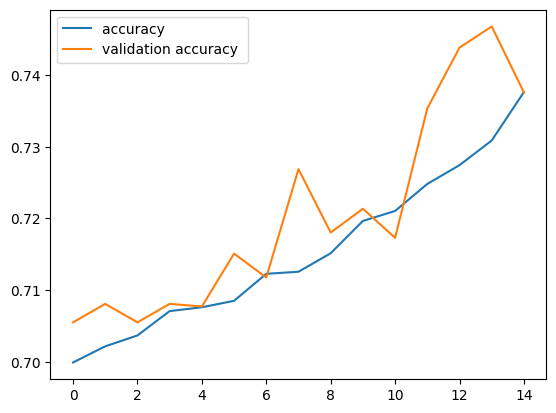

In [ ]:
plt.plot(h1.history['accuracy'],label='accuracy ')
plt.plot(h1.history['val_accuracy'],label='validation accuracy ')
plt.legend()

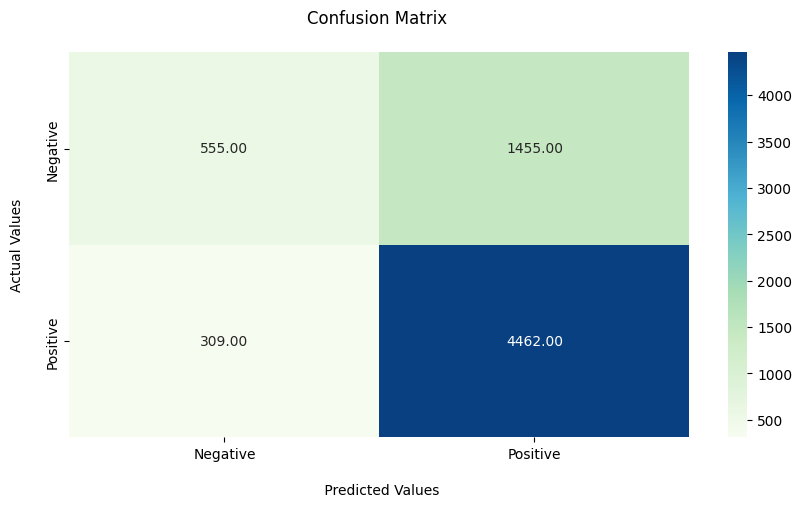

In [ ]:
from sklearn.metrics import confusion_matrix
conf(X_test_lasso_selected,y_test,model1)

In [ ]:
models=['BI_LSTM']
results=pd.DataFrame({'Models':models,'Accuracy':acc, 'Precision':precision,'Recall':recall,'F1':f1,'AURoc':auroc})
results

,Models,Accuracy,Precision,Recall,F1,AURoc
0,BI_LSTM,0.739861,0.754098,0.935234,0.834955,0.605677


##CNN


In [ ]:
import time
s_time=time.time()
model1,h1=modeling(X_train_lasso_selected,y_train,'CNN')
e_time=time.time()

Epoch 1/15
763/763 [==============================] - 8s 7ms/step - loss: 0.6938 - accuracy: 0.5008 - val_loss: 0.6736 - val_accuracy: 0.7044
Epoch 2/15
763/763 [==============================] - 6s 8ms/step - loss: 0.6572 - accuracy: 0.7002 - val_loss: 0.6430 - val_accuracy: 0.7044
Epoch 3/15
763/763 [==============================] - 6s 7ms/step - loss: 0.6324 - accuracy: 0.7002 - val_loss: 0.6259 - val_accuracy: 0.7044
Epoch 4/15
763/763 [==============================] - 5s 6ms/step - loss: 0.6165 - accuracy: 0.7002 - val_loss: 0.6109 - val_accuracy: 0.7044
Epoch 5/15
763/763 [==============================] - 7s 9ms/step - loss: 0.6077 - accuracy: 0.7002 - val_loss: 0.6056 - val_accuracy: 0.7044
Epoch 6/15
763/763 [==============================] - 5s 6ms/step - loss: 0.6037 - accuracy: 0.7002 - val_loss: 0.6019 - val_accuracy: 0.7044
Epoch 7/15
763/763 [==============================] - 5s 6ms/step - loss: 0.6022 - accuracy: 0.7002 - val_loss: 0.6010 - val_accuracy: 0.7044
Epoch 

In [ ]:
time=(e_time - s_time)/60
time

1.4259597738583882

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
#confusion matrix
def conf(x_test,y_test,model):
  label_encoder = LabelEncoder ()
  y_pred = model.predict(x_test,verbose=0)
  pred_class_y=[]
  for i in range(y_pred.shape[0]):
    pred_class_y.append(np.argmax(y_pred[:][i]))
  pred_class_y=np.array(pred_class_y)
  #pred_class_y=label_encoder.inverse_transform(pred_class_y)
  #y_test=label_encoder.inverse_transform(y_test)
  target=["Negative","Positive"]

  plt.figure(figsize=(10,5
                      ))
  fx=sns.heatmap(confusion_matrix(y_test,pred_class_y), annot=True, fmt=".2f",cmap="GnBu")
  fx.set_title('Confusion Matrix \n');
  fx.set_xlabel('\n Predicted Values\n')
  fx.set_ylabel('Actual Values\n');
  fx.xaxis.set_ticklabels(target)
  fx.yaxis.set_ticklabels(target)
  plt.show()

In [ ]:
acc=[]
precision=[]
recall=[]
f1=[]
auroc=[]
y_pred1=model1.predict(X_test_lasso_selected,verbose=0)
y_pred=[]
for i in range(y_pred1.shape[0]):
    y_pred.append(np.argmax(y_pred1[:][i]))
y_pred=np.array(y_pred)
acc.append(accuracy_score(y_test, y_pred) )
precision.append (precision_score(y_test, y_pred))
recall.append(recall_score(y_test, y_pred))
f1.append(f1_score(y_test, y_pred))
auroc.append(roc_auc_score(y_test, y_pred))


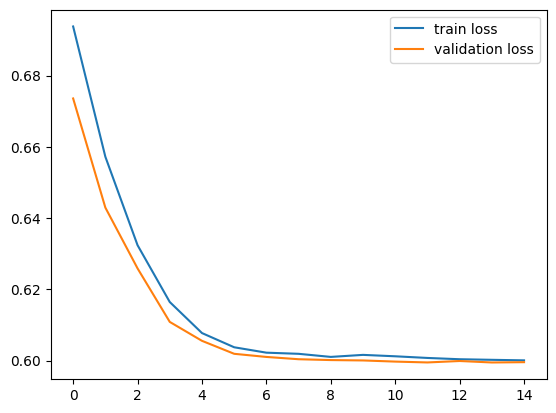

In [ ]:
import matplotlib.pyplot as plt

plt.plot(h1.history['loss'],label="train loss")
plt.plot(h1.history['val_loss'],label='validation loss')
#plt.plot(h.history['accuracy'],label='accuracy ')
plt.legend()

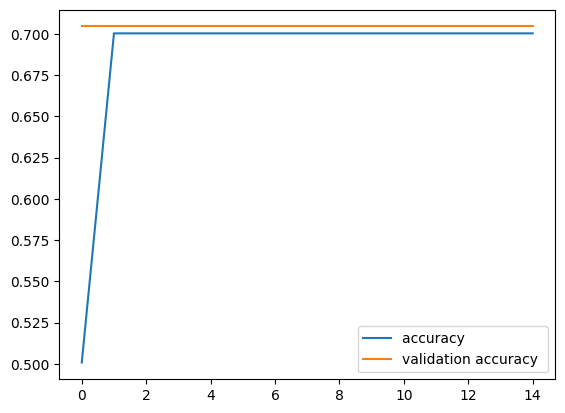

In [ ]:
plt.plot(h1.history['accuracy'],label='accuracy ')
plt.plot(h1.history['val_accuracy'],label='validation accuracy ')
plt.legend()

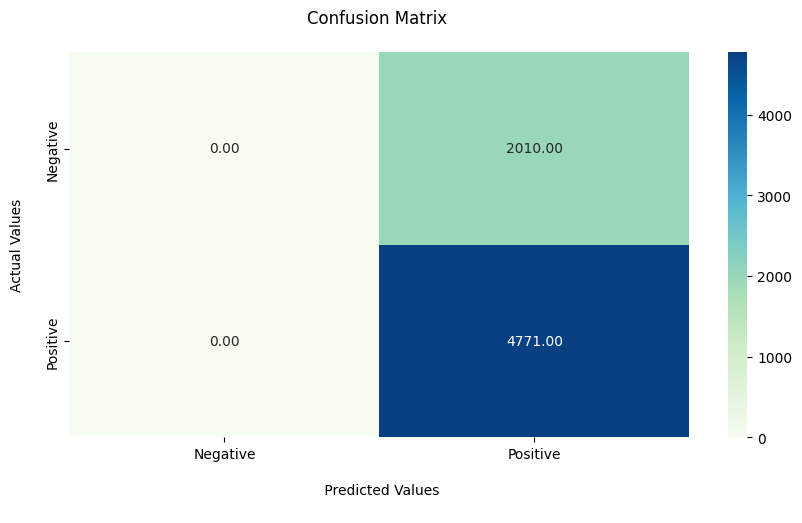

In [ ]:
from sklearn.metrics import confusion_matrix
conf(X_test_lasso_selected,y_test,model1)

In [ ]:
models=['CNN']
results=pd.DataFrame({'Models':models,'Accuracy':acc, 'Precision':precision,'Recall':recall,'F1':f1,'AURoc':auroc})
results

,Models,Accuracy,Precision,Recall,F1,AURoc
0,CNN,0.703584,0.703584,1.0,0.826004,0.5


##GRU


In [ ]:
import time
s_time=time.time()
model1,h1=modeling(X_train_lasso_selected,y_train,'GRU')
e_time=time.time()

Epoch 1/15
763/763 [==============================] - 183s 233ms/step - loss: 0.5926 - accuracy: 0.7029 - val_loss: 0.5845 - val_accuracy: 0.7070
Epoch 2/15
763/763 [==============================] - 185s 242ms/step - loss: 0.5868 - accuracy: 0.7052 - val_loss: 0.5901 - val_accuracy: 0.7077
Epoch 3/15
763/763 [==============================] - 178s 233ms/step - loss: 0.5836 - accuracy: 0.7053 - val_loss: 0.5774 - val_accuracy: 0.7055
Epoch 4/15
763/763 [==============================] - 177s 232ms/step - loss: 0.5799 - accuracy: 0.7074 - val_loss: 0.5751 - val_accuracy: 0.7129
Epoch 5/15
763/763 [==============================] - 180s 235ms/step - loss: 0.5759 - accuracy: 0.7086 - val_loss: 0.5700 - val_accuracy: 0.7125
Epoch 6/15
763/763 [==============================] - 190s 249ms/step - loss: 0.5711 - accuracy: 0.7109 - val_loss: 0.5688 - val_accuracy: 0.7224
Epoch 7/15
763/763 [==============================] - 183s 239ms/step - loss: 0.5662 - accuracy: 0.7129 - val_loss: 0.5579 -

In [ ]:
time=(e_time - s_time)/60
time

45.666065736611685

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
#confusion matrix
def conf(x_test,y_test,model):
  label_encoder = LabelEncoder ()
  y_pred = model.predict(x_test,verbose=0)
  pred_class_y=[]
  for i in range(y_pred.shape[0]):
    pred_class_y.append(np.argmax(y_pred[:][i]))
  pred_class_y=np.array(pred_class_y)
  #pred_class_y=label_encoder.inverse_transform(pred_class_y)
  #y_test=label_encoder.inverse_transform(y_test)
  target=["Negative","Positive"]

  plt.figure(figsize=(10,5
                      ))
  fx=sns.heatmap(confusion_matrix(y_test,pred_class_y), annot=True, fmt=".2f",cmap="GnBu")
  fx.set_title('Confusion Matrix \n');
  fx.set_xlabel('\n Predicted Values\n')
  fx.set_ylabel('Actual Values\n');
  fx.xaxis.set_ticklabels(target)
  fx.yaxis.set_ticklabels(target)
  plt.show()

In [ ]:
acc=[]
precision=[]
recall=[]
f1=[]
auroc=[]
y_pred1=model1.predict(X_test_lasso_selected,verbose=0)
y_pred=[]
for i in range(y_pred1.shape[0]):
    y_pred.append(np.argmax(y_pred1[:][i]))
y_pred=np.array(y_pred)
acc.append(accuracy_score(y_test, y_pred) )
precision.append (precision_score(y_test, y_pred))
recall.append(recall_score(y_test, y_pred))
f1.append(f1_score(y_test, y_pred))
auroc.append(roc_auc_score(y_test, y_pred))


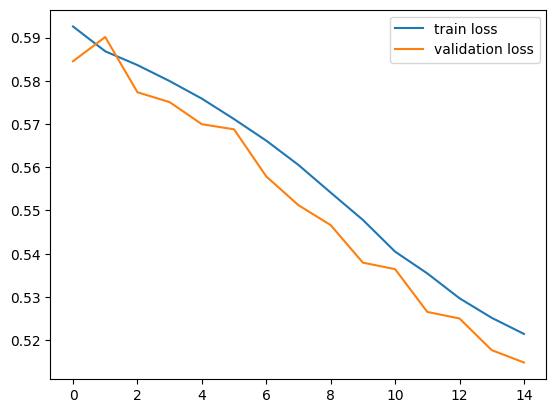

In [ ]:
import matplotlib.pyplot as plt

plt.plot(h1.history['loss'],label="train loss")
plt.plot(h1.history['val_loss'],label='validation loss')
#plt.plot(h.history['accuracy'],label='accuracy ')
plt.legend()

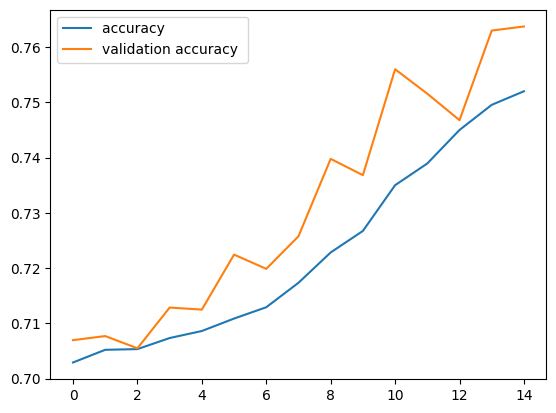

In [ ]:
plt.plot(h1.history['accuracy'],label='accuracy ')
plt.plot(h1.history['val_accuracy'],label='validation accuracy ')
plt.legend()

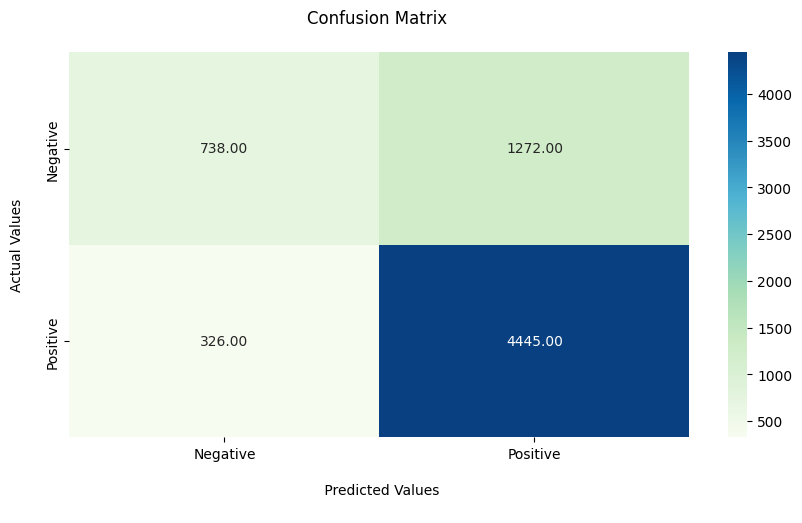

In [ ]:
from sklearn.metrics import confusion_matrix
conf(X_test_lasso_selected,y_test,model1)

In [ ]:
models=['GRU']
results=pd.DataFrame({'Models':models,'Accuracy':acc, 'Precision':precision,'Recall':recall,'F1':f1,'AURoc':auroc})
results

,Models,Accuracy,Precision,Recall,F1,AURoc
0,GRU,0.764342,0.777506,0.931671,0.847635,0.649417


##LSTM

In [ ]:
import time
s_time=time.time()
model1,h1=modeling(X_train_lasso_selected,y_train,'LSTM')
e_time=time.time()

Epoch 1/15
763/763 [==============================] - 400s 516ms/step - loss: 0.6002 - accuracy: 0.7006 - val_loss: 0.5866 - val_accuracy: 0.7051
Epoch 2/15
763/763 [==============================] - 394s 517ms/step - loss: 0.5894 - accuracy: 0.7009 - val_loss: 0.5859 - val_accuracy: 0.7073
Epoch 3/15
763/763 [==============================] - 391s 512ms/step - loss: 0.5887 - accuracy: 0.7015 - val_loss: 0.5850 - val_accuracy: 0.7036
Epoch 4/15
763/763 [==============================] - 385s 505ms/step - loss: 0.5879 - accuracy: 0.7023 - val_loss: 0.5838 - val_accuracy: 0.7073
Epoch 5/15
763/763 [==============================] - 379s 497ms/step - loss: 0.5870 - accuracy: 0.7017 - val_loss: 0.5843 - val_accuracy: 0.7095
Epoch 6/15
763/763 [==============================] - 383s 502ms/step - loss: 0.5858 - accuracy: 0.7030 - val_loss: 0.5810 - val_accuracy: 0.7033
Epoch 7/15
763/763 [==============================] - 382s 500ms/step - loss: 0.5849 - accuracy: 0.7039 - val_loss: 0.5797 -

In [ ]:
time=(e_time - s_time)/60
time

96.4956508398056

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
#confusion matrix
def conf(x_test,y_test,model):
  label_encoder = LabelEncoder ()
  y_pred = model.predict(x_test,verbose=0)
  pred_class_y=[]
  for i in range(y_pred.shape[0]):
    pred_class_y.append(np.argmax(y_pred[:][i]))
  pred_class_y=np.array(pred_class_y)
  #pred_class_y=label_encoder.inverse_transform(pred_class_y)
  #y_test=label_encoder.inverse_transform(y_test)
  target=["Negative","Positive"]

  plt.figure(figsize=(10,5
                      ))
  fx=sns.heatmap(confusion_matrix(y_test,pred_class_y), annot=True, fmt=".2f",cmap="GnBu")
  fx.set_title('Confusion Matrix \n');
  fx.set_xlabel('\n Predicted Values\n')
  fx.set_ylabel('Actual Values\n');
  fx.xaxis.set_ticklabels(target)
  fx.yaxis.set_ticklabels(target)
  plt.show()

In [ ]:
acc=[]
precision=[]
recall=[]
f1=[]
auroc=[]
y_pred1=model1.predict(X_test_lasso_selected,verbose=0)
y_pred=[]
for i in range(y_pred1.shape[0]):
    y_pred.append(np.argmax(y_pred1[:][i]))
y_pred=np.array(y_pred)
acc.append(accuracy_score(y_test, y_pred) )
precision.append (precision_score(y_test, y_pred))
recall.append(recall_score(y_test, y_pred))
f1.append(f1_score(y_test, y_pred))
auroc.append(roc_auc_score(y_test, y_pred))


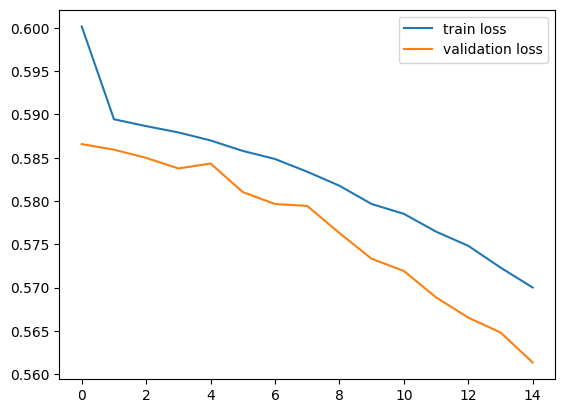

In [ ]:
import matplotlib.pyplot as plt

plt.plot(h1.history['loss'],label="train loss")
plt.plot(h1.history['val_loss'],label='validation loss')
#plt.plot(h.history['accuracy'],label='accuracy ')
plt.legend()

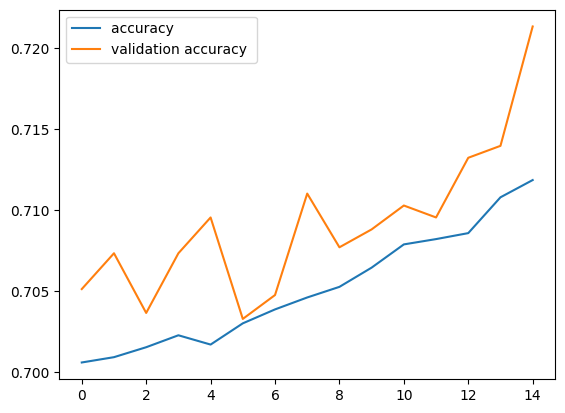

In [ ]:
plt.plot(h1.history['accuracy'],label='accuracy ')
plt.plot(h1.history['val_accuracy'],label='validation accuracy ')
plt.legend()

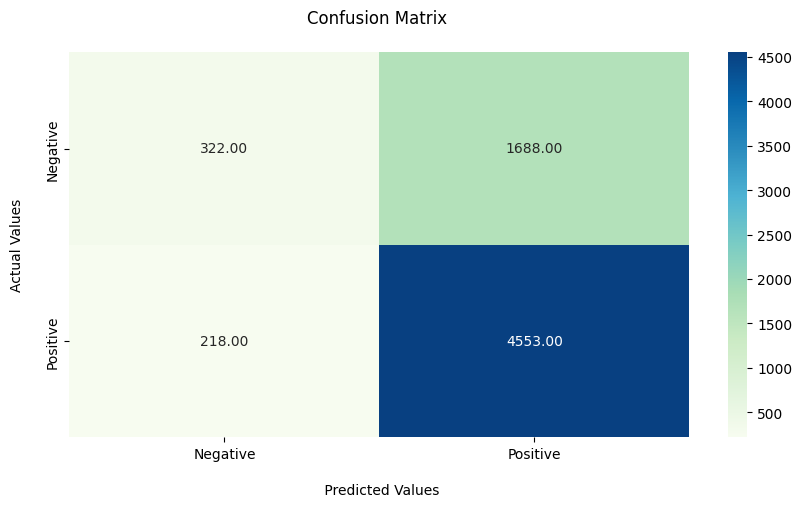

In [ ]:
from sklearn.metrics import confusion_matrix
conf(X_test_lasso_selected,y_test,model1)

In [ ]:
models=['LSTM']
results=pd.DataFrame({'Models':models,'Accuracy':acc, 'Precision':precision,'Recall':recall,'F1':f1,'AURoc':auroc})
results

,Models,Accuracy,Precision,Recall,F1,AURoc
0,LSTM,0.718921,0.729531,0.954307,0.826916,0.557253
